In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
data=pd.read_csv('loan.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [3]:
data.iloc[0]

id                                                                       1077501
member_id                                                                1296599
loan_amnt                                                                   5000
funded_amnt                                                                 5000
funded_amnt_inv                                                             4975
term                                                                   36 months
int_rate                                                                   10.65
installment                                                               162.87
grade                                                                          B
sub_grade                                                                     B2
emp_title                                                                    NaN
emp_length                                                             10+ years
home_ownership              

判断列的缺失值，确定阀值，删除缺失值过多列

In [4]:
def not_null_count(column):
    column_null=pd.isnull(column)
    null=column[column_null]
    return len(null)
column_null_count=data.apply(not_null_count)
print(column_null_count)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [5]:
half_count=len(data)/2
data=data.dropna(thresh=half_count,axis=1)
#data=data.drop(['desc','url'],axis=1)
data.to_csv('loan2.csv',index=False)

In [6]:
loans=pd.read_csv('loan2.csv',encoding='utf-8')
loans.shape
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [7]:
loans.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mt

In [8]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [9]:
used_col=['loan_amnt','term','int_rate','grade','issue_d','addr_state','loan_status','purpose','annual_inc','emp_length']
used_data=loans[used_col]

In [10]:
used_data.head(5)

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length
0,5000.0,36 months,10.65,B,Dec-2011,AZ,Fully Paid,credit_card,24000.0,10+ years
1,2500.0,60 months,15.27,C,Dec-2011,GA,Charged Off,car,30000.0,< 1 year
2,2400.0,36 months,15.96,C,Dec-2011,IL,Fully Paid,small_business,12252.0,10+ years
3,10000.0,36 months,13.49,C,Dec-2011,CA,Fully Paid,other,49200.0,10+ years
4,3000.0,60 months,12.69,B,Dec-2011,OR,Current,other,80000.0,1 year


判断某列是否存在缺失值

In [11]:
def not_null_count(column):
    column_null=pd.isnull(column)
    null=column[column_null]
    return len(null)
column_null_count=used_data.apply(not_null_count)
print(column_null_count)

loan_amnt          0
term               0
int_rate           0
grade              0
issue_d            0
addr_state         0
loan_status        0
purpose            0
annual_inc         4
emp_length     44825
dtype: int64


对某一列进行filter

判断某一列的值：#used_data[used_data['loan_status']=='n']

In [12]:
used_data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

对贷款情况进行分类变量编码

In [13]:
def coding(col,codeDict):
    colCoded=pd.Series(col,copy=True)
    for key,value in codeDict.items():
        colCoded.replace(key,value,inplace=True)
    return colCoded
pd.value_counts(used_data['loan_status'])
used_data['Loan_Status_Coded']=coding(used_data['loan_status'],
                                      {'Current':0,'Fully Paid':0,'Charged Off':1,
                                       'Late (31-120 days)':1,'Late (16-30 days)':1,'In Grace Period':1,'Issued':1,
                                      'Does not meet the credit policy. Status:Fully Paid':0,
                                      'Does not meet the credit policy. Status:Charged Off':1,
                                      'Default':1})
print('\nAfter Coding:')
pd.value_counts(used_data['Loan_Status_Coded'])


After Coding:


0    811490
1     75889
Name: Loan_Status_Coded, dtype: int64

In [14]:
[i for i in pd.value_counts(used_data['Loan_Status_Coded'])]

[811490, 75889]

In [16]:
from pyecharts import Pie
attr=['正常','违约']
pie=Pie("贷款状态占比")
pie.add("",attr,[int(i)for i in pd.value_counts(used_data['Loan_Status_Coded'])],is_label_show=True)
pie

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/anaconda3/envs/python3/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


Text(0.5, 1.0, "Loan amount's distribution")

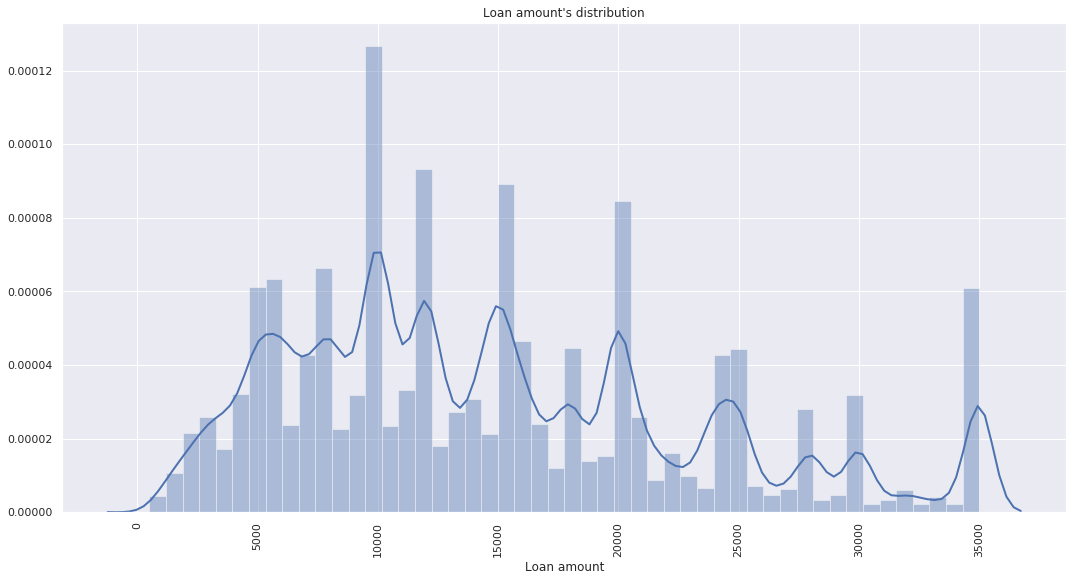

In [18]:
plt.figure(figsize=(18,9))
sns.set()
sns.set_context("notebook",font_scale=1,rc={'lines.linewidth':2})
sdisplot_loan=sns.distplot(used_data['loan_amnt'])
plt.xticks(rotation=90)
plt.xlabel('Loan amount')
plt.title('Loan amount\'s distribution')
#displot_loan.figure.savefig("Loan_amount")

In [19]:
pd.value_counts(loans['term'])

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [20]:
[i for i in pd.value_counts(loans['term'])]
attr=['36个月','60个月']
pie=Pie("贷款期限占比")
pie.add("",attr,[float(i) for i in pd.value_counts(loans['term'])],is_label_show=True)
pie

60个月占比30%，36个月占比70%，贷款期限越长，不确定性越大，违约可能性更大，期限较长的贷款产品风险越高。

从期限角度看，平台风险偏小的资产占大部分。

In [21]:
used_data['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

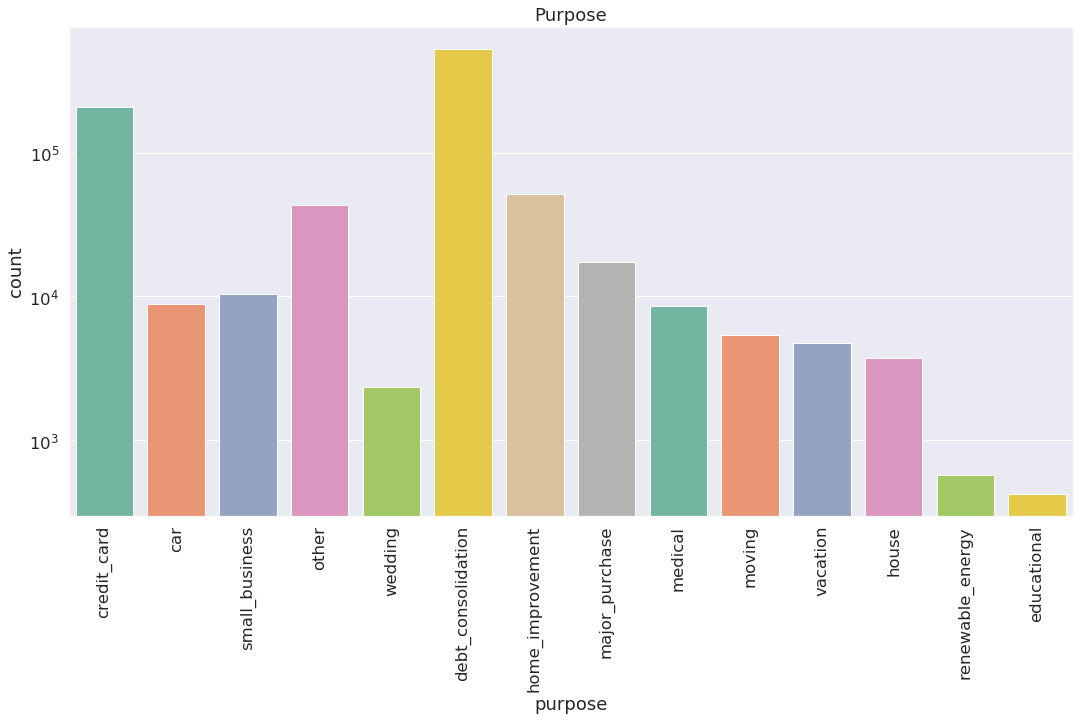

In [23]:
plt.figure(figsize=(18,9))
sns.set()
sns.set_context("notebook",font_scale=1.5,rc={'lines.linewidth':2.5})
total=float(len(loans.index))
ax=sns.countplot(x='purpose',data=used_data,palette='Set2')
ax.set(yscale='log')
plt.xticks(rotation=90)
plt.title('Purpose')
plt.show()
#ax.figure.savefig('Purpose')

In [24]:
used_data['grade'].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [26]:
attr=['B','C','A','D','E','F','G']
pie=Pie('信用等级比例')
pie.add("",attr,[float(i) for i in pd.value_counts(loans['grade'])],is_label_show=True)
pie

等级评分A～G，A信用等级最高，G等级最低，发生违约可能性更大。平台客户信用等级占比较多的客户为B类，其次是C和A类，合计（28.68%+27.71%+16.7%），E、F、G三类信用等级比在11.12%，可以看出Lending Club授信部门对申请人的资信情况把关严格

In [50]:
used_data.describe()

,loan_amnt,int_rate,annual_inc,Loan_Status_Coded
count,842550.000000,842550.000000,8.425500e+05,842550.000000
mean,14913.743487,13.245163,7.635332e+04,0.084918
std,8450.325760,4.385807,6.564285e+04,0.278760
min,500.000000,5.320000,1.896000e+03,0.000000
25%,8325.000000,9.990000,4.700000e+04,0.000000
50%,13200.000000,12.990000,6.500000e+04,0.000000
75%,20000.000000,16.200000,9.000000e+04,0.000000
max,35000.000000,28.990000,9.500000e+06,1.000000


In [51]:
used_data.tail()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length,Loan_Status_Coded
887374,10000.0,36 months,11.99,B,Jan-2015,CA,Current,debt_consolidation,31000.0,8 years,0
887375,24000.0,36 months,11.99,B,Jan-2015,NJ,Current,home_improvement,79000.0,10+ years,0
887376,13000.0,60 months,15.99,D,Jan-2015,TN,Current,debt_consolidation,35000.0,5 years,0
887377,12000.0,60 months,19.99,E,Jan-2015,MA,Current,debt_consolidation,64400.0,1 year,0
887378,20000.0,36 months,11.99,B,Jan-2015,FL,Current,credit_card,100000.0,10+ years,0


贷款利率种类

Text(0.5, 1.0, "Interest Rate's distribution")

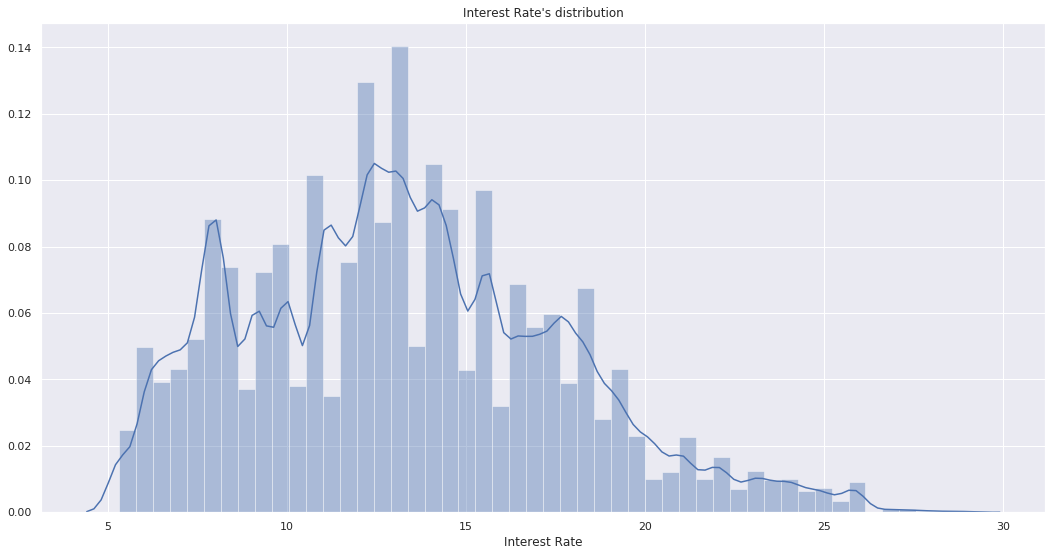

In [53]:
plt.figure(figsize=(18,9))
sns.set()
sns.set_context('notebook',font_scale=1,rc={'line.linewidth':2})
sdisplot_loan=sns.distplot(used_data['int_rate'])
#plt.xticks(rotation=90)
plt.xlabel('Interest Rate')
plt.title('Interest Rate\'s distribution')
#sdisplot_loan.figure.savefig('Interest Rate')

贷款利率右偏正态分布，利率中位数12.99%，利率最高值28.99%，利率最小值5.32%。利率是资金的价格，利率越高，借款人借贷成本越高，借款人违约的可能性越大。

In [55]:
used_data['issue_d2']=pd.to_datetime(used_data['issue_d'])
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length,Loan_Status_Coded,issue_d2
0,5000.0,36 months,10.65,B,Dec-2011,AZ,Fully Paid,credit_card,24000.0,10+ years,0,2011-12-01
1,2500.0,60 months,15.27,C,Dec-2011,GA,Charged Off,car,30000.0,< 1 year,1,2011-12-01
2,2400.0,36 months,15.96,C,Dec-2011,IL,Fully Paid,small_business,12252.0,10+ years,0,2011-12-01
3,10000.0,36 months,13.49,C,Dec-2011,CA,Fully Paid,other,49200.0,10+ years,0,2011-12-01
4,3000.0,60 months,12.69,B,Dec-2011,OR,Current,other,80000.0,1 year,0,2011-12-01


时间转换，增加月份列

In [57]:
data_group_by_date=used_data.groupby(['issue_d2']).sum()
data_group_by_date.reset_index(inplace=True)
data_group_by_date['issue_month']=data_group_by_date['issue_d2'].apply(lambda x:x.to_period('M'))

In [58]:
loan_amount_group_by_month=data_group_by_date.groupby('issue_month')['loan_amnt'].sum()
loan_amount_group_by_month_df=pd.DataFrame(loan_amount_group_by_month).reset_index()
loan_amount_group_by_month_df

,issue_month,loan_amnt
0,2007-06,85350.0
1,2007-07,341625.0
2,2007-08,503300.0
3,2007-09,372950.0
4,2007-10,753225.0
5,2007-11,1008650.0
6,2007-12,1887175.0
7,2008-01,2926000.0
8,2008-02,2959225.0
9,2008-03,4150050.0


Text(0.5, 1.0, 'Month VS Loan_amount')

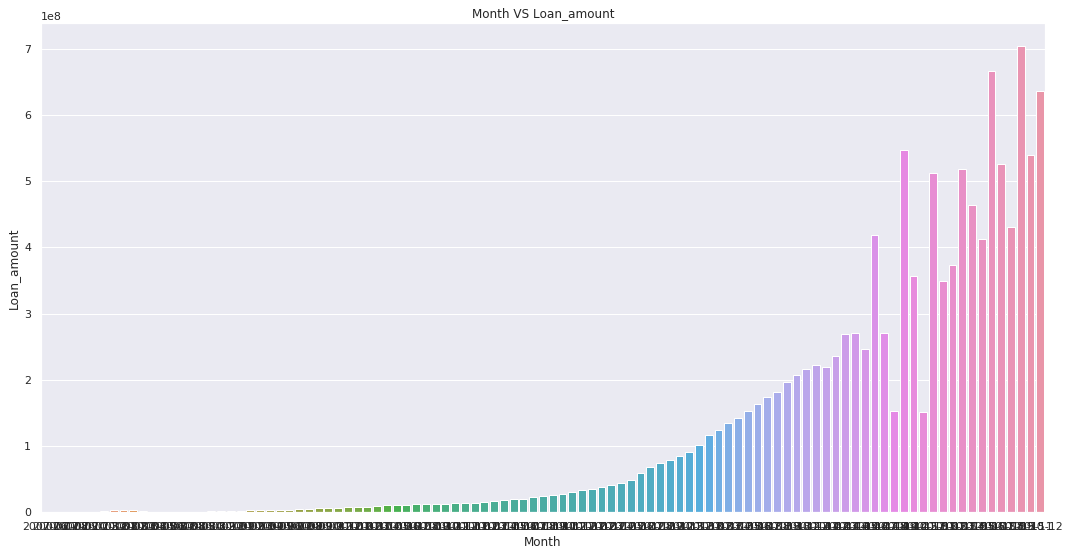

In [60]:
plt.figure(figsize=(18,9))
sns.set()
sns.set_context('notebook',font_scale=1,rc={'line.linewidth':2})
plot1=sns.barplot(x='issue_month',y='loan_amnt',data=loan_amount_group_by_month_df)
plt.xlabel('Month')
plt.ylabel('Loan_amount')
plt.title('Month VS Loan_amount')
#plot1.figure.savefig('Month VS Loan_amount')

In [61]:
data_group_by_grade_term=used_data.groupby(['grade','term'])['int_rate'].mean()
data_group_by_grade_term_df=pd.DataFrame(data_group_by_grade_term).reset_index()
data_group_by_grade_term_pivot=data_group_by_grade_term_df.pivot(index='grade',columns='term',values='int_rate')
data_group_by_grade_term_pivot

term,36 months,60 months
grade,,
A,7.219905,8.000028
B,10.869140,10.656683
C,13.924277,14.095514
D,17.166407,17.192732
E,19.751589,19.958243
F,23.280631,23.641434
G,23.826131,25.852583


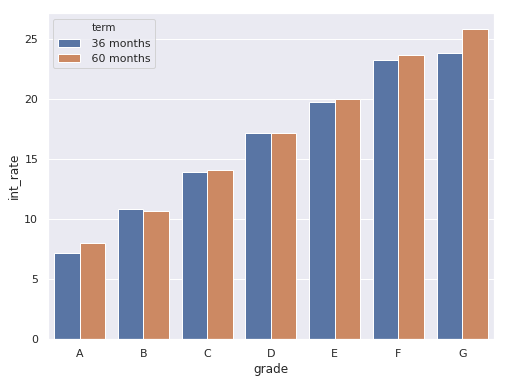

In [62]:
plt.figure(figsize=(8,6))
gtrbar=sns.barplot(x='grade',y='int_rate',hue='term',data=data_group_by_grade_term_df)


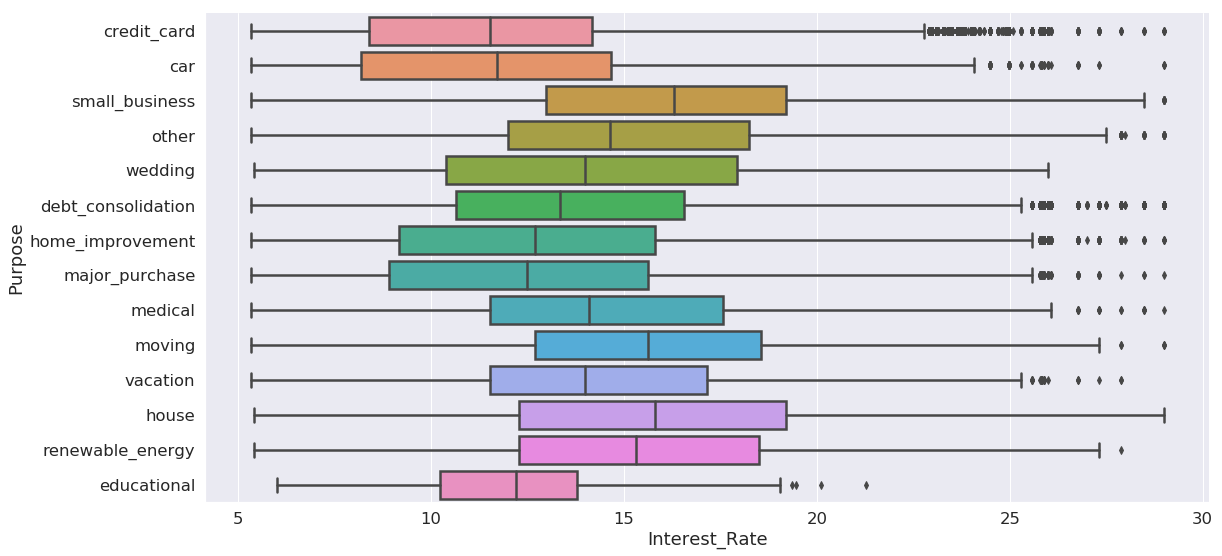

In [63]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})
sboxplot=sns.boxplot(y='purpose',x='int_rate',data=loans)
sns.despine(top=True)
plt.xlabel('Interest_Rate')
plt.ylabel('Purpose')
plt.show()

<Figure size 1080x648 with 0 Axes>

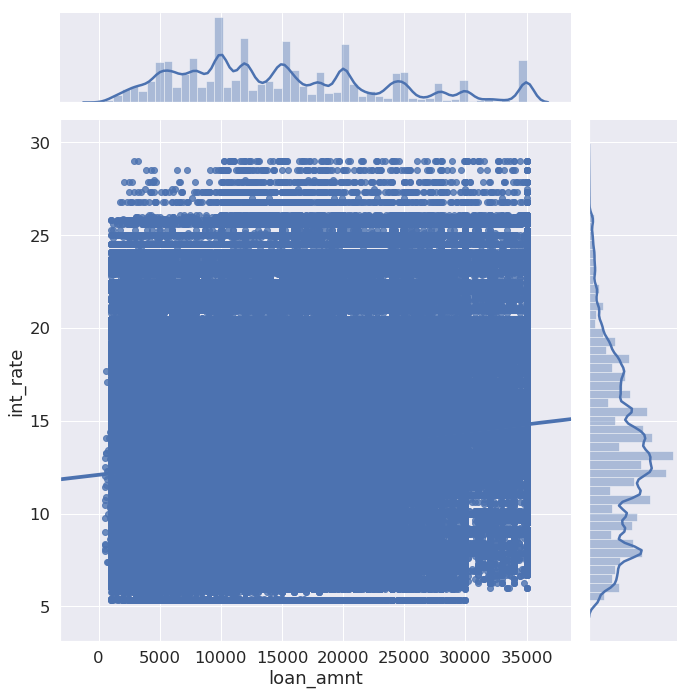

In [64]:
plt.figure(figsize=(15,9))
j_plot=sns.jointplot('loan_amnt','int_rate',data=used_data,kind='reg',size=10)

Text(0.5, 1.0, 'Interest Rate VS Delinq_2yrs')

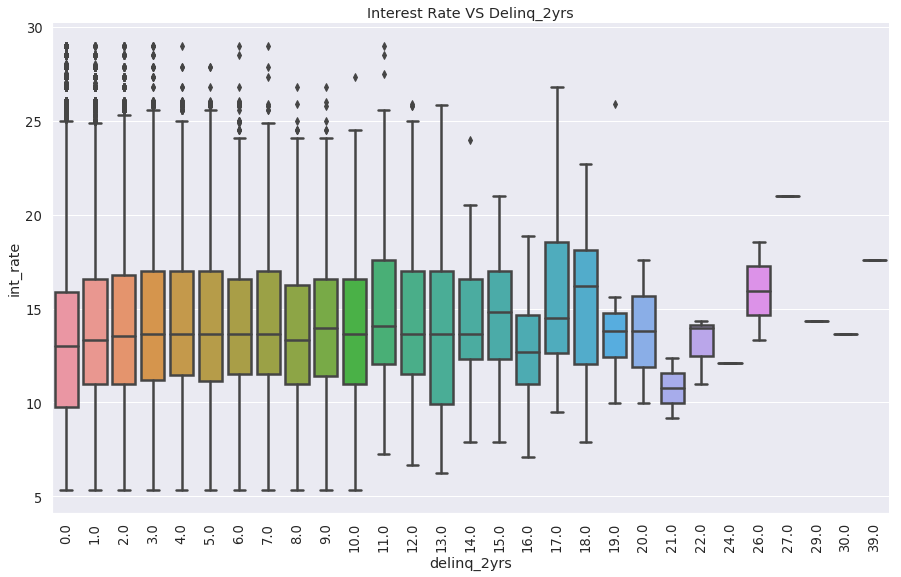

In [67]:
plt.figure(figsize=(15,9))
sns.set_context('notebook',font_scale=1.2,rc={'lines.linewidth':2.5})
sboxplot2=sns.boxplot(x='delinq_2yrs',y='int_rate',data=loans)
sns.despine(top=True)
plt.xticks(rotation=90)
plt.title('Interest Rate VS Delinq_2yrs')


In [71]:
mapping_dict={
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'n/a':0
    }
}

In [77]:
used_data['emp_length']=used_data['emp_length'].replace(mapping_dict)


In [81]:
used_data['annual_inc']=used_data['annual_inc'].astype(str)
used_data['annual_inc']=used_data['annual_inc'].str.replace(',','').astype(float)

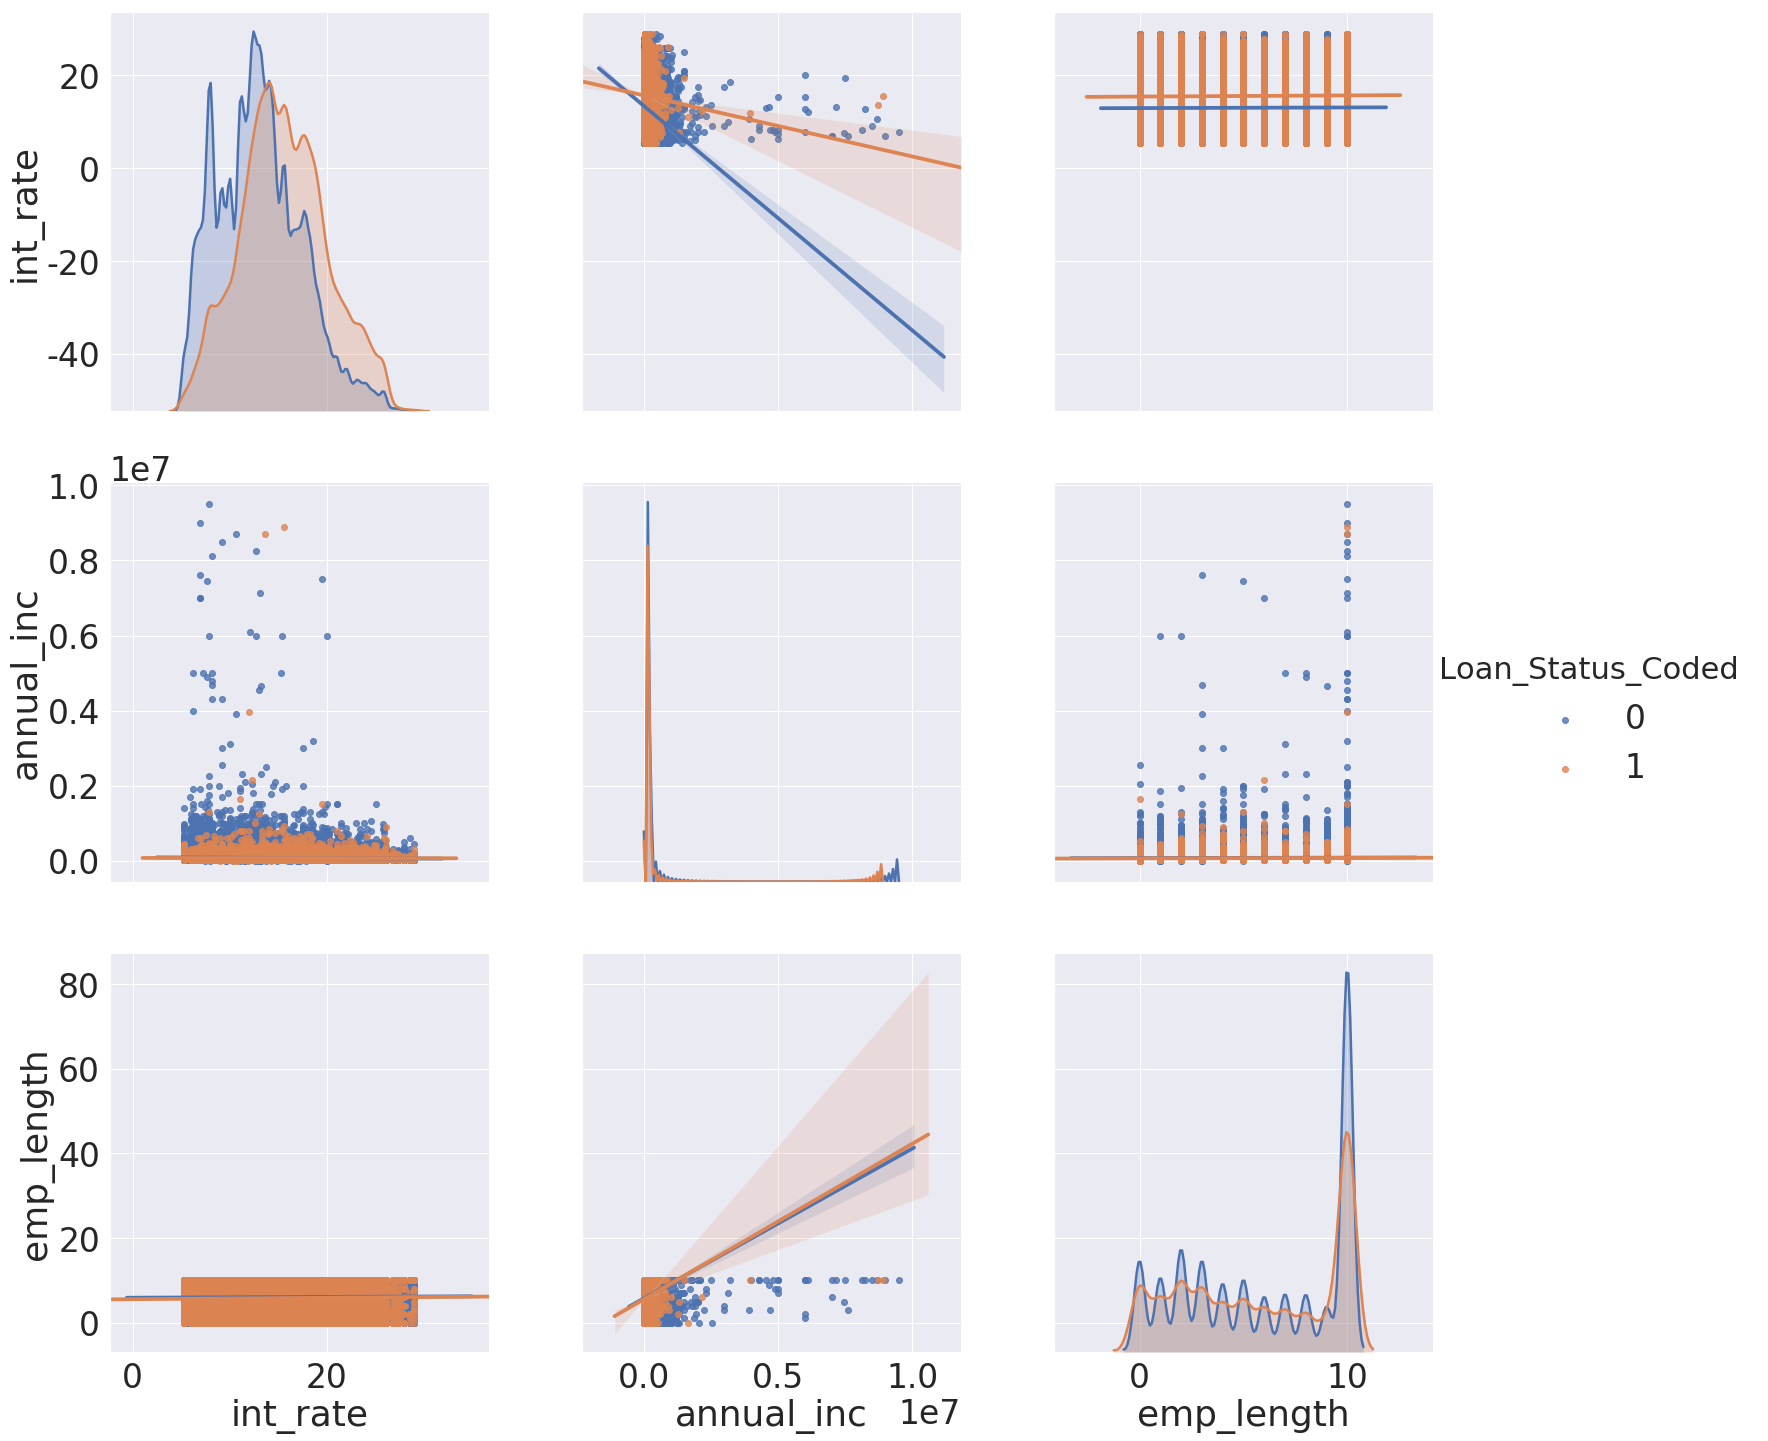

In [82]:
sns.set_context('notebook',font_scale=3,rc={'lines.linewidth':2.5})
p_plot=sns.pairplot(used_data,vars=['int_rate','annual_inc','emp_length'],hue='Loan_Status_Coded',
                   diag_kind='kde',kind='reg',size=7)
#p_plot.savefig('Interest Rate VS Annual Income VS Emp_length')

In [83]:
used_data.corr()

,loan_amnt,int_rate,annual_inc,emp_length,Loan_Status_Coded
loan_amnt,1.000000,0.149628,0.324960,0.106001,0.007672
int_rate,0.149628,1.000000,-0.072623,0.009285,0.161901
annual_inc,0.324960,-0.072623,1.000000,0.063998,-0.029888
emp_length,0.106001,0.009285,0.063998,1.000000,-0.016040
Loan_Status_Coded,0.007672,0.161901,-0.029888,-0.016040,1.000000


<Figure size 1368x648 with 0 Axes>

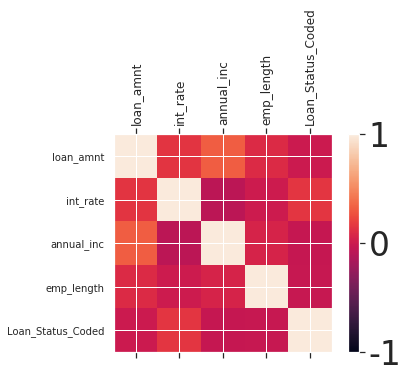

In [114]:
names=['loan_amnt','int_rate','annual_inc','emp_length','Loan_Status_Coded']
correlations=used_data.corr()
plt.figure(figsize=(19,9))
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=10)
plt.show()